# Linear Regression-Beginner Basic
___
## Content
**So the basic step of linear regeression is:**
1. import packages
2. import dataset
3. prepare dataset
    * check for null or outlier data ( if doeas, clean the data)
    * splitting the data for tarining and testing
    
    3.5. EDA() Exploratory Data Analysis )- optional

4. build model
5. do prediction
6. Evaluate trained data


---

In [69]:
#step 1- import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [48]:
#step2 - import datset
dataset = pd.read_csv('dataset/heart.csv')

In [49]:
# view some of our data
dataset.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [50]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
print(
    f'Train data has {dataset.shape[1]} features, {dataset.shape[0]} observations.\nTrain features are:\n{dataset.columns.tolist()}\n'
)

Train data has 14 features, 303 observations.
Train features are:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']



In [52]:
# step3 - prepare dataset
# checking for null value
dataset.isnull().sum().sum()

0

In [53]:
# renaming columns label to understand better
dataset.columns = [
    'umur', 'jantina', 'jenis_sakit_dada', 'tekanan_darah_rehat', 'kolestrol', 'gula_dalam_darah_puasa',
    'ecg_rehat', 'kadar_degupan_jantung_capaian_max','angina_disebakan_senaman', 'st_depression', 'slope',
    'bilangan_salur_utama', 'ujian_stress_Thallium', 'kondisi']

In [54]:
dataset.nunique()

umur                                  41
jantina                                2
jenis_sakit_dada                       4
tekanan_darah_rehat                   49
kolestrol                            152
gula_dalam_darah_puasa                 2
ecg_rehat                              3
kadar_degupan_jantung_capaian_max     91
angina_disebakan_senaman               2
st_depression                         40
slope                                  3
bilangan_salur_utama                   5
ujian_stress_Thallium                  4
kondisi                                2
dtype: int64

So, our data look promising ( no missing value and etc). lets continue with splititng for training and testing

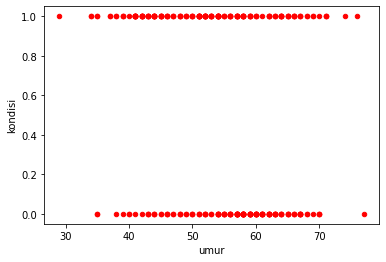

In [58]:
#lets view our data scatter before splitting
dataset.plot(kind='scatter', x ='umur', y='kondisi', color='red')
plt.show()

In [68]:
#spliting data
features = dataset.iloc[:, :-2]
target = dataset.iloc[:, -1]
x_train, x_test, y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=48)

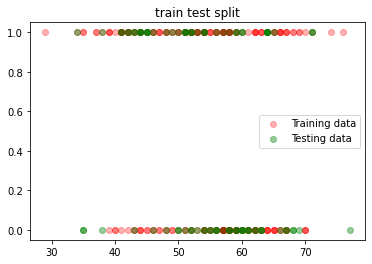

In [60]:
plt.scatter(x_train['umur'], y_train, label='Training data', color='red', alpha=0.3)
plt.scatter(x_test['umur'], y_test, label='Testing data', color='green', alpha=0.4)
plt.legend()
plt.title('train test split')
plt.show()

In [61]:
#step4 -build model and train
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [64]:
#step 5- do prediction
y_pred = model.predict(x_test)
target_pred =[]       
for r in y_pred:
    if r > 0.5:
        r = 1
        target_pred.append(r)
    else:
        r=0
        target_pred.append(r)


In [67]:
#step 6- evaluate model/ prediction

print(
    f'The accuracy of the model prediction is: {accuracy_score(y_test, target_pred)}'
)

The accuracy of the model prediction is: 0.8351648351648352
